# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("Agg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_ex1_trades_df()
ex2_trades = ta.get_ex2_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(183, 183)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                12859
           取引回数                  183
           開始日時  2021-04-13 17:43:32
           終了日時  2021-04-14 04:42:08
        取引時間[H]             10:58:36
      取引単位[BTC]               0.0005
  利確しきい値[JPY]                 5000
損切りマージン[JPY]                 5000
-------------------  -------------------


トレード結果
-----------  ------
開始[JPY]     13628
終了[JPY]     13043
利益[JPY]      -585
開始[BTC]    0.0024
終了[BTC]    0.0024
利益[BTC]         0
開始[TOTAL]   30068
終了[TOTAL]   29471
利益[TOTAL]    -597
-----------  ------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
     -597         -593.68       -3.32


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2021-04-14 03:18:05,sell,3453.758,buy,3464.318,-10.560
2021-04-14 03:20:45,buy,3450.000,sell,3462.706,12.706
2021-04-14 03:21:28,sell,3450.124,buy,3459.966,-9.842
2021-04-14 03:22:45,buy,3448.808,sell,3459.499,10.691
2021-04-14 03:34:33,sell,3450.000,buy,3457.889,-7.889
2021-04-14 03:35:16,buy,3445.101,sell,3455.736,10.635
2021-04-14 03:45:40,sell,3440.000,buy,3448.415,-8.415
2021-04-14 03:45:50,buy,3436.356,sell,3447.618,11.262
2021-04-14 03:46:27,sell,3433.211,buy,3441.506,-8.295


In [12]:
round(sum(profit_df.profit), 3)

168.859

## トレードグラフ

In [13]:
ex1_ticks = ta.get_ex1_ticks_df()
ex2_ticks = ta.get_ex2_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(12859, 12859)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1.0, 'exchange2 bid/exchange1 ask')

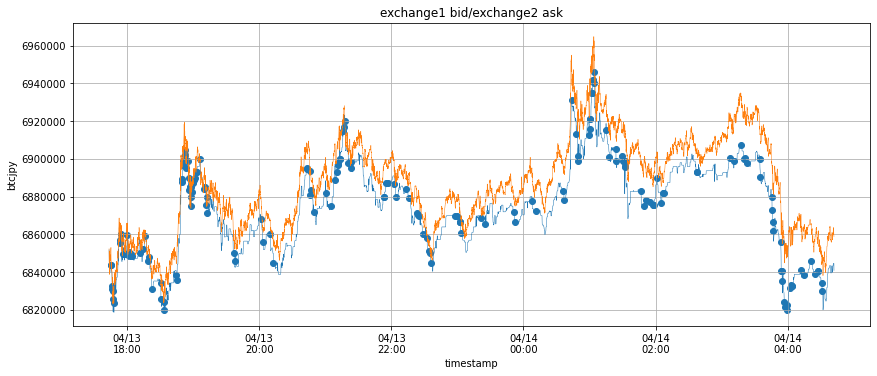

In [16]:
fig1

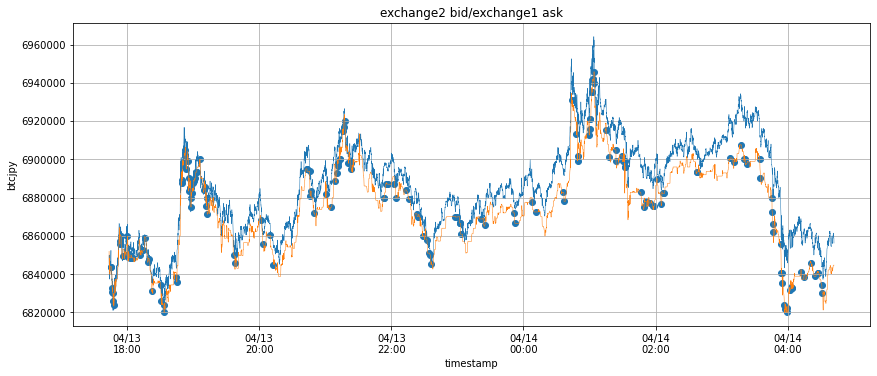

In [17]:
fig2